# Valna jednadžba


Valna jednadžba, čije ćemo detalje objasniti kasnije, može se svesti na problem rubnih 
vrijednosti kao u sljedećem primjeru:

\begin{align*}
u_{tt}&=u_{xx},\quad 0<x<\pi\\
u(0,t)&=0,\quad u(\pi,t)=0, \quad t>0\\
u(x,0)&=f(x),\quad u_t(x,0)=g(x),\quad 0<x<\pi.
\end{align*}

Prema klasfikaciji, PDJ je hiperbolička, i može se riješiti separacijom varijabli i svođenjem na SLP.

Funkcija $u(x,t)$ daje položaj (visinu) vala na mjestu $x$ u trenutku $t$ (na primjer, titranje žice čiji su krajevi u ovom slučaju fiksni).

Primijetimo da uz rubne uvjete, kao početne uvjete zadajemo položaj (visinu) i brzinu vala u trenutku $t=0$.


Pretpostavimo da je 

$$
u(x,t)=X(x) \cdot T(t).
$$

Jednadžba glasi

$$
X''\cdot T=X\cdot T'',
$$

odnosno

$$
\displaystyle\frac{X''}{X}=\frac{T''}{T}=-\lambda.
$$

Iz rubnih uvjeta vidimo da možemo definirati regularni SLP po varijabli $x$:

\begin{align*}
&X''=-\lambda X,\quad 0<x<\pi\\
&X(0)=0,\quad X(\pi)=0.
\end{align*}

Kao i do sada, analizirajmo posebno tri slučaja:


__Slučaj 1.__ Za $\lambda=0$ je $X=ax+b$, $X(0)=b=0$, $X(\pi)=a\pi=0$, pa je $a=b=0$. Dakle, $\lambda_0=0$ nije svojstvena vrijednost.


__Slučaj 2.__ Za $\lambda<0$ je

$$
X=a e^{\sqrt{-\lambda} x} +b e^{-\sqrt{-\lambda}x},
$$

pa prvi rubni uvjet povlači 

$$
X(0)=a+b=0,
$$

odnosno $a=-b$. Drugi uvjet sada glasi 

$$
X(\pi)=a\big(e^{\sqrt{-\lambda} \pi} -e^{-\sqrt{-\lambda}\pi}\big)
$$

pa je $a=b=0$. Funkcija $X=0$ ne može biti svojstvena funkcija pa $\lambda<0$ nije svojstvena vrijednost. 


__Slučaj 3.__ Za $\lambda>0$ je

$$
X=a \sin (\sqrt{\lambda} x) +b \cos (\sqrt{\lambda}x).
$$

Prvi rubni uvjet povlači 

$$
X(0)=b=0.
$$

Drugi uvjet glasi 

$$
X(\pi)=a\sin(\sqrt{\lambda}\pi)=0
$$

pa je $\sqrt{\lambda} \pi=n\pi$. Dakle, $\lambda_n=n^2$, $n\in\mathbb{N}$ su svojstvene vrijednosti, a 
$X_n(x)=\sin (nx)$ su pripadne svojstvene funkcije.

Druga jednadžba sada glasi $T''=-n^2T$ pa je 

$$
T_n= a_n \cos (nt)+b_n \sin (nt).
$$

Prema principu superpozicije vrijedi

\begin{align*}
u(x,t)&=\sum_{n=1}^\infty u_n(x,t)=\sum_{n=1}^\infty X_n(x) T_n(t) \\
&= \sum_{n=1}^\infty [a_n \cos (nt)+ b_n \sin(nt)] \sin(nx).
\end{align*}

Prvi početni uvjet daje

$$
u(x,0)=\sum_{n=1}^\infty a_n \sin(nx)=f(x)
$$

pa su $a_n$ koeficijenti razvoja funkcije $f(x)$ u Fourierov red:

$$
a_n=\frac{(f,\sin (nx))}{(\sin(nx),\sin(nx))}
=\frac{\int\limits_0^\pi f(x)\sin(nx)\, dx}{\int\limits_0^\pi \sin^2(nx)\, dx}.
$$

Drugi početni uvjet daje

$$
u_t(x,0)= \sum_{n=1}^\infty b_n n \sin(nx)=g(x)
$$

pa su $n b_n$ koeficijenti razvoja funkcije $g(x)$ u Fourierov red, odnosno

$$
b_n=\frac{1}{n} \frac{(g,\sin (nx))}{(\sin(nx),\sin(nx))}
=\frac{1}{n}\frac{\int\limits_0^\pi g(x)\sin(nx)\, dx}{\int\limits_0^\pi \sin^2(nx)\, dx}.
$$

Nacrtajmo rješenje problema za $f(x)=\sin(x)$ i $g(x)=x$.

Za simboličko računanje koristimo paket `SymPy.jl`, a za crtanje paket `PyPlot.jl`.

In [1]:
using PyPlot
using SymPy

In [2]:
n=symbols("n",integer=true,positive=true)

n

In [3]:
f(x)=sin.(x)
g(x)=x

g (generic function with 1 method)

In [4]:
a=integrate(x->f(x)*sin(n*x),0,pi)/integrate(x->sin(n*x)^2,0,pi)

  //0   for n != 1\
  ||              |
2*|<pi            |
  ||--  otherwise |
  \\2             /
-------------------
         pi        

In [5]:
b=integrate(x->g(x)*sin(n*x),0,pi)/integrate(x->sin(n*x)^2,0,pi)/n

       n 
-2*(-1)  
---------
     2   
    n    

In [6]:
# Izračunajumo numeričke vrijednosti koeficijenata
l=10
Na=[N(a(n)) for n=1:l]
Nb=[N(b(n)) for n=1:l]

10-element Array{Real,1}:
   2   
 -1//2 
  2//9 
 -1//8 
  2//25
 -1//18
  2//49
 -1//32
  2//81
 -1//50

In [7]:
# Pripremimo mrežu za crtanje
m=40
X=range(0,stop=pi,length=m)
T=range(0,stop=5,length=m)
XT=collect(Iterators.product(X,T))

40×40 Array{Tuple{Float64,Float64},2}:
 (0.0, 0.0)        (0.0, 0.128205)        …  (0.0, 5.0)      
 (0.0805537, 0.0)  (0.0805537, 0.128205)     (0.0805537, 5.0)
 (0.161107, 0.0)   (0.161107, 0.128205)      (0.161107, 5.0) 
 (0.241661, 0.0)   (0.241661, 0.128205)      (0.241661, 5.0) 
 (0.322215, 0.0)   (0.322215, 0.128205)      (0.322215, 5.0) 
 (0.402768, 0.0)   (0.402768, 0.128205)   …  (0.402768, 5.0) 
 (0.483322, 0.0)   (0.483322, 0.128205)      (0.483322, 5.0) 
 (0.563876, 0.0)   (0.563876, 0.128205)      (0.563876, 5.0) 
 (0.644429, 0.0)   (0.644429, 0.128205)      (0.644429, 5.0) 
 (0.724983, 0.0)   (0.724983, 0.128205)      (0.724983, 5.0) 
 (0.805537, 0.0)   (0.805537, 0.128205)   …  (0.805537, 5.0) 
 (0.88609, 0.0)    (0.88609, 0.128205)       (0.88609, 5.0)  
 (0.966644, 0.0)   (0.966644, 0.128205)      (0.966644, 5.0) 
 ⋮                                        ⋱                  
 (2.2555, 0.0)     (2.2555, 0.128205)        (2.2555, 5.0)   
 (2.33606, 0.0)    (2.33606, 0.

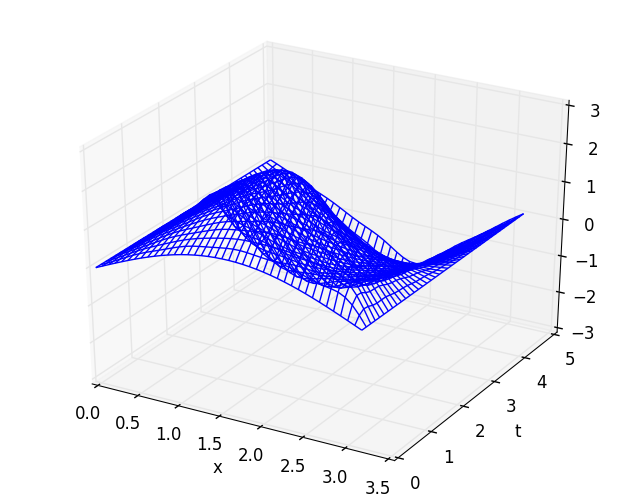

PyObject <matplotlib.text.Text object at 0x7f931aa343d0>

In [8]:
u(xt)=sum([ (Na[k]*cos.(k*xt[2])+Nb[k].*sin.(k*xt[2])).*sin.(k*xt[1]) for k in collect(1:l)]) 
mesh(X,T,Matrix(map(u,XT)'))
xlabel("x")
ylabel("t")

In [9]:
# Provjera rubnog uvjeta
x=range(0,stop=pi,length=m)
y=f(x)
z=sum([Na[k]*sin.(k*x) for k=1:10])

40-element Array{Float64,1}:
 0.0                   
 0.08046656871672588   
 0.16041128085776024   
 0.23931566428755774   
 0.3166679938014725    
 0.3919666098600751    
 0.4647231720437685    
 0.534465826127801     
 0.6007422642379788    
 0.6631226582407952    
 0.7212024473438146    
 0.7746049618276546    
 0.8229838658936564    
 ⋮                     
 0.7746049618276546    
 0.7212024473438146    
 0.6631226582407952    
 0.6007422642379792    
 0.5344658261278012    
 0.4647231720437687    
 0.39196660986007514   
 0.3166679938014725    
 0.23931566428755768   
 0.16041128085776052   
 0.08046656871672608   
 1.2246467991473532e-16

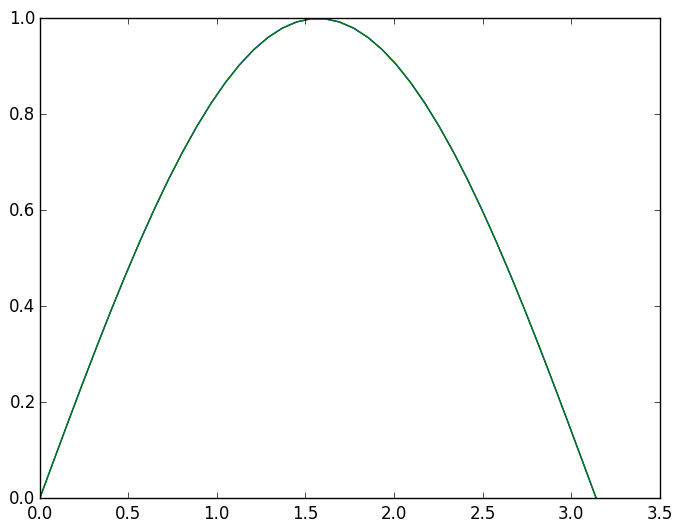

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f931a70c590>
 PyObject <matplotlib.lines.Line2D object at 0x7f931a70c710>

In [10]:
plot(x,y,x,z)

__Zadatak__: Što se dogodi ako početni uvjet nije kompatibilan s rubnim uvjetima? Nacrtajte i objasnite rješenje za 
$f(x)=\cos(x)$.